# Daraz Product Review Analysis Using Python

## Project Overview

In [ ]:
##  Importing Necessary Libraries

In [2]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from textblob import TextBlob


In [5]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
TextBlob("Daraz delivery was fast and the product is amazing!").sentiment

Sentiment(polarity=0.4750000000000001, subjectivity=0.75)

In [7]:
import pandas as pd

In [9]:
df = pd.read_csv('daraz_com-product_reviews.csv', encoding='ISO-8859-1')

In [10]:
df.head()
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Billing Uniq Id', 'Rating',
       'Review Title', 'Review Rating', 'Review Date', 'User Id', 'Brand',
       'Category', 'Sub Category', 'Product Description', 'Asin', 'Url',
       'Review Content', 'Verified Purchase', 'Helpful Review Count',
       'Manufacturer Response'],
      dtype='object')

In [11]:
df_clean = df[['Review Content', 'Review Rating', 'Category', 'Verified Purchase']].dropna()

In [12]:
df_clean['Review Rating'] = pd.to_numeric(df_clean['Review Rating'], errors='coerce')

In [13]:
#Sentiment Analysis with Python (TextBlob)

In [14]:
from textblob import TextBlob

In [15]:
df_clean['Sentiment'] = df_clean['Review Content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [16]:
df_clean['Sentiment Label'] = df_clean['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [ ]:
#Analyze & Summarize

In [18]:
category_sentiment = df_clean.groupby(['Category', 'Sentiment Label']).size().unstack().fillna(0)

In [19]:
avg_rating = df_clean.groupby('Category')['Review Rating'].mean().sort_values()


In [20]:
verified_sentiment = df_clean.groupby(['Verified Purchase', 'Sentiment Label']).size().unstack()

In [21]:
#Export Cleaned Data to Excel
df_clean.to_csv('daraz_cleaned_reviews.csv', index=False)

In [22]:
df_clean.head()

,Review Content,Review Rating,Category,Verified Purchase,Sentiment,Sentiment Label
0,This is the one natural deodorant that works f...,5,Personal Care,Verified Purchase,0.062500,Positive
1,I am staying away from the conventional deodor...,5,Personal Care,Verified Purchase,0.140873,Positive
2,Do not buy this from Amazon it's either defect...,1,Personal Care,Verified Purchase,0.360000,Positive
3,I started using this because I was getting cys...,3,Personal Care,NO,0.126001,Positive
4,Dont buy this from amazon!!!! I never write re...,1,Personal Care,Verified Purchase,0.200000,Positive


## Sentiment Analysis

In [25]:
## 😊 Sentiment Analysis Using TextBlob
df_clean['Sentiment Score'] = df_clean['Review Content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [26]:
def get_sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [27]:
df_clean['Sentiment Label'] = df_clean['Sentiment Score'].apply(get_sentiment_label)

In [28]:
df_clean[['Review Content', 'Sentiment Score', 'Sentiment Label']].head(10)

,Review Content,Sentiment Score,Sentiment Label
0,This is the one natural deodorant that works f...,0.062500,Positive
1,I am staying away from the conventional deodor...,0.140873,Positive
2,Do not buy this from Amazon it's either defect...,0.360000,Positive
3,I started using this because I was getting cys...,0.126001,Positive
4,Dont buy this from amazon!!!! I never write re...,0.200000,Positive
5,Great natural deodorant! It works!,0.478125,Positive
6,Great for those who are sensitive to perfumed ...,0.631250,Positive
7,Well I stopped using it today. Gave it about 3...,0.095833,Positive
8,I was excited to try this deodorant. I have be...,0.253399,Positive
9,"The only deodorant Iâll ever use anymore, no...",0.001786,Positive


## Visual Charts

### Sentiment Distribution

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
sentiment_counts = df_clean['Sentiment Label'].value_counts()

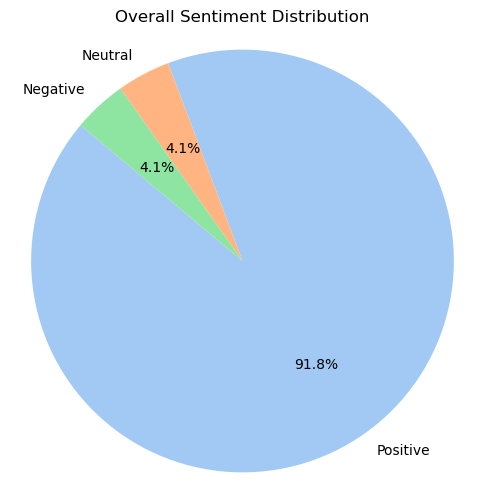

In [31]:
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Overall Sentiment Distribution')
plt.axis('equal')
plt.show()

### Average Review Rating by Product Category

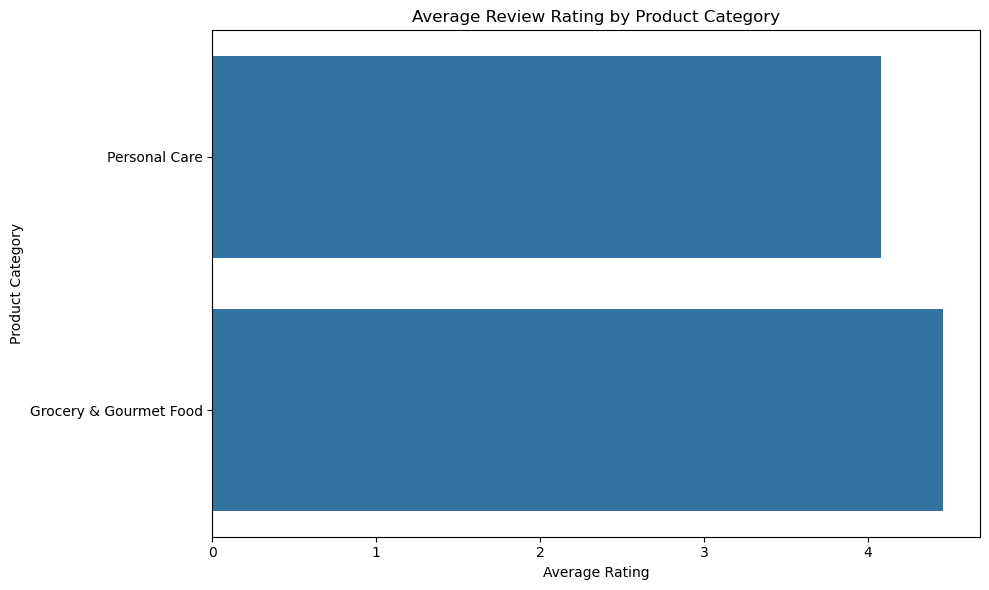

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x='Review Rating', y='Category', estimator='mean', errorbar=None)
plt.title('Average Review Rating by Product Category')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

### Sentiment Count by Product Category

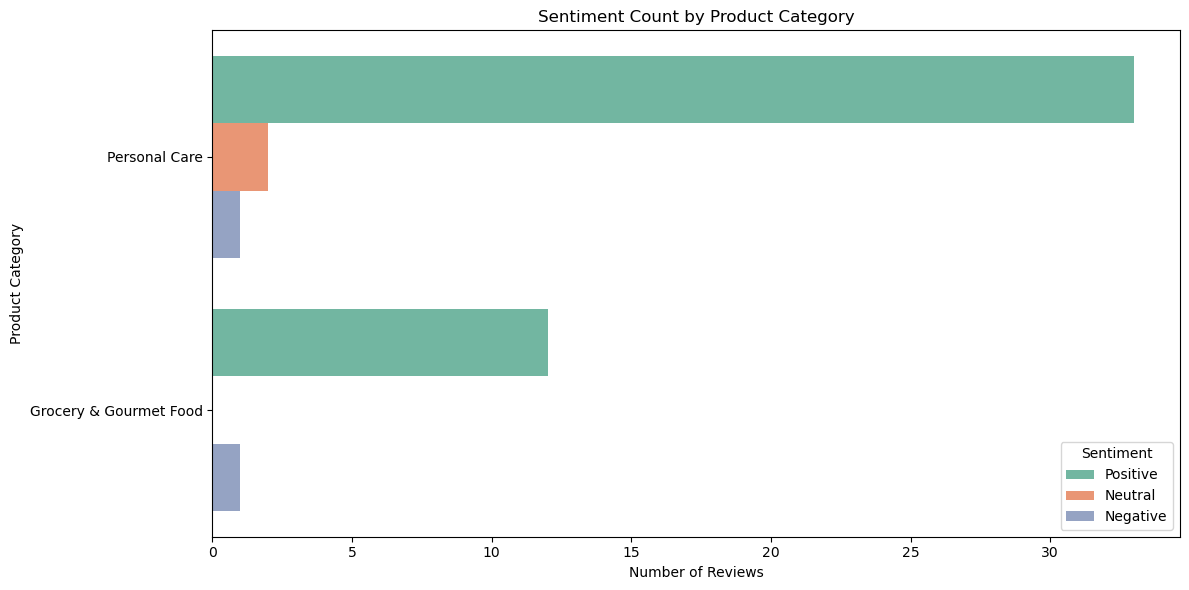

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, y='Category', hue='Sentiment Label', palette='Set2')
plt.title('Sentiment Count by Product Category')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Category')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [35]:
df_clean.to_csv('daraz_cleaned_reviews_for_tableau.csv', index=False)
print("Data exported successfully!")

Data exported successfully!


### Identifying high-risk categories

In [36]:
high_risk = df_clean[df_clean['Sentiment Label'] == 'Negative']
high_risk_categories = high_risk['Category'].value_counts().head()
print(high_risk_categories)

Category
Personal Care             1
Grocery & Gourmet Food    1
Name: count, dtype: int64


###  Enhancing the Product Listings with Clearer Descriptions

In [38]:
!pip install wordcloud

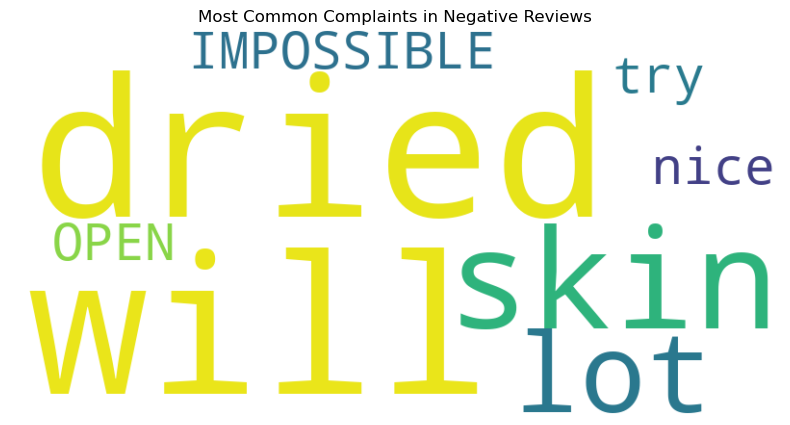

In [39]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter negative reviews
negative_reviews = df_clean[df_clean['Sentiment Label'] == 'Negative']['Review Content']

# Combine all reviews into one text
text = " ".join(negative_reviews)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Complaints in Negative Reviews")
plt.show()

### Monitoring Sentiment Trends Monthly

In [41]:
df_clean['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')
df_clean['Review Month'] = df_clean['Review Date'].dt.to_period('M')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12652\2730203778.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')


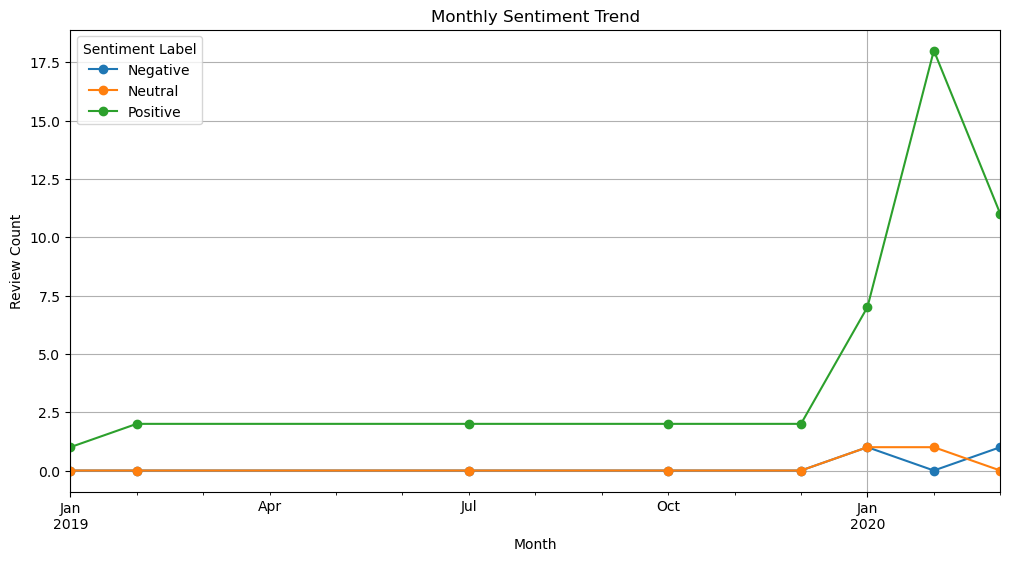

In [42]:
sentiment_trend = df_clean.groupby(['Review Month', 'Sentiment Label']).size().unstack().fillna(0)
sentiment_trend.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Monthly Sentiment Trend')
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.grid(True)
plt.show()


##Conclusion
#This analysis provided useful insights into customer sentiment and behavior on Daraz. Future work could include more advanced NLP, or modeling to predict product ratings from text.